In [159]:
import pandas as pd
# El mantra de las visualizaciones
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [2]:
df = pd.read_csv("measurements.csv")

In [4]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [14]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [8]:
df.shape

(388, 12)

In [9]:
df['refill liters'].unique()

array(['45', nan, '37,6', '37,7', '38', '38,3', '10', '39', '41', '37',
       '37,2'], dtype=object)

In [10]:
df['refill gas'].unique()

array(['E10', nan, 'SP98'], dtype=object)

In [12]:
df['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [13]:
df.temp_inside.unique()

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

In [15]:
# Columns refill gas and refill gas are full of NaNs, only 13 records are actual data, so I decide to delete them
# Column 'special' doesn't have relevant data, so I am dropping it to
# I create dfs without those columns

In [218]:
dfs = df.drop(['refill liters','refill gas', 'specials'], axis=1)

In [219]:
dfs.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
dtype: int64

In [220]:
dfs.temp_inside.fillna('None',inplace=True)

In [221]:
set(dfs.temp_inside)

{'19',
 '20',
 '20,5',
 '21',
 '21,5',
 '22',
 '22,5',
 '23',
 '23,5',
 '24',
 '24,5',
 '25',
 '25,5',
 'None'}

In [222]:
def coma(x):
    if x != 'None':
        x = float(x.replace(',','.'))
    else:
        x = np.nan
    return x

In [223]:
dfs.temp_inside = dfs.temp_inside.apply(coma)

In [225]:
dfs.temp_inside.fillna(round(dfs.temp_inside.mean(),2), inplace=True)

In [226]:
list(set(dfs.temp_inside))

[24.5,
 25.5,
 19.0,
 20.0,
 21.93,
 21.0,
 21.5,
 22.5,
 20.5,
 23.0,
 23.5,
 24.0,
 22.0,
 25.0]

In [190]:
dfs.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [227]:
dfs.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,21.5,12,E10,0,0,0
1,12,"4,2",30,21.5,13,E10,0,0,0
2,"11,2","5,5",38,21.5,15,E10,0,0,0
3,"12,9","3,9",36,21.5,14,E10,0,0,0
4,"18,5","4,5",46,21.5,15,E10,0,0,0


In [228]:
dfs.distance = dfs.distance.apply(coma)

In [229]:
dfs.consume = dfs.consume.apply(coma)

In [230]:
def tofl(x):
    x = float(x)
    return x

In [231]:
dfs.speed = dfs.speed.apply(tofl)

In [232]:
dfs.temp_outside = dfs.temp_outside.apply(tofl)

In [233]:
dfs.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26.0,21.5,12.0,E10,0,0,0
1,12.0,4.2,30.0,21.5,13.0,E10,0,0,0
2,11.2,5.5,38.0,21.5,15.0,E10,0,0,0
3,12.9,3.9,36.0,21.5,14.0,E10,0,0,0
4,18.5,4.5,46.0,21.5,15.0,E10,0,0,0


In [234]:
dfs.gas_type.unique()

array(['E10', 'SP98'], dtype=object)

In [235]:
gas = {'E10':0, 'SP98':1}

In [236]:
dfs.gas_type = dfs.gas_type.map(gas)

In [237]:
dfs.AC.unique()

array([0, 1])

In [238]:
df.rain.unique()

array([0, 1])

In [239]:
df.sun.unique()

array([0, 1])

In [240]:
dfs.gas_type.unique()

array([0, 1])

/tmp/ipykernel_102/2783581977.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corre, dtype=np.bool))


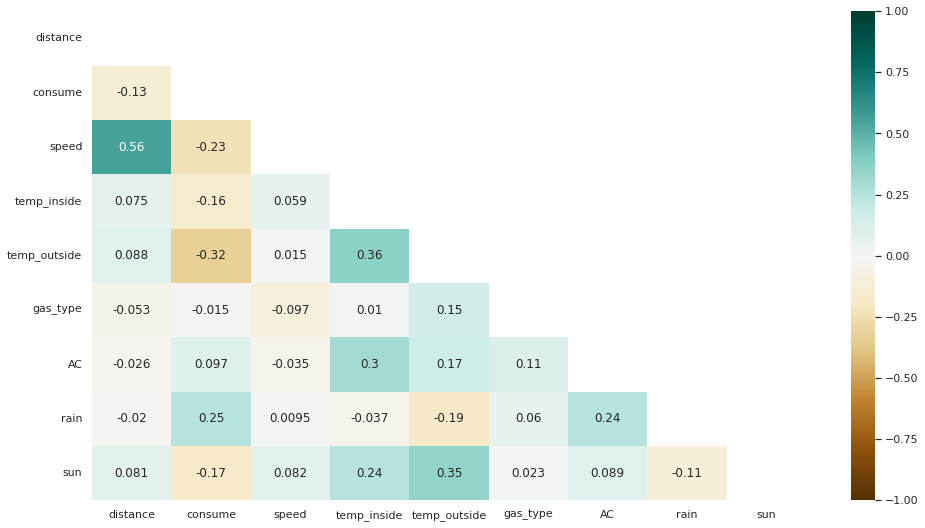

In [241]:
corre = dfs.corr()
mask = np.triu(np.ones_like(corre, dtype=np.bool))
heatmap = sns.heatmap(corre, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');

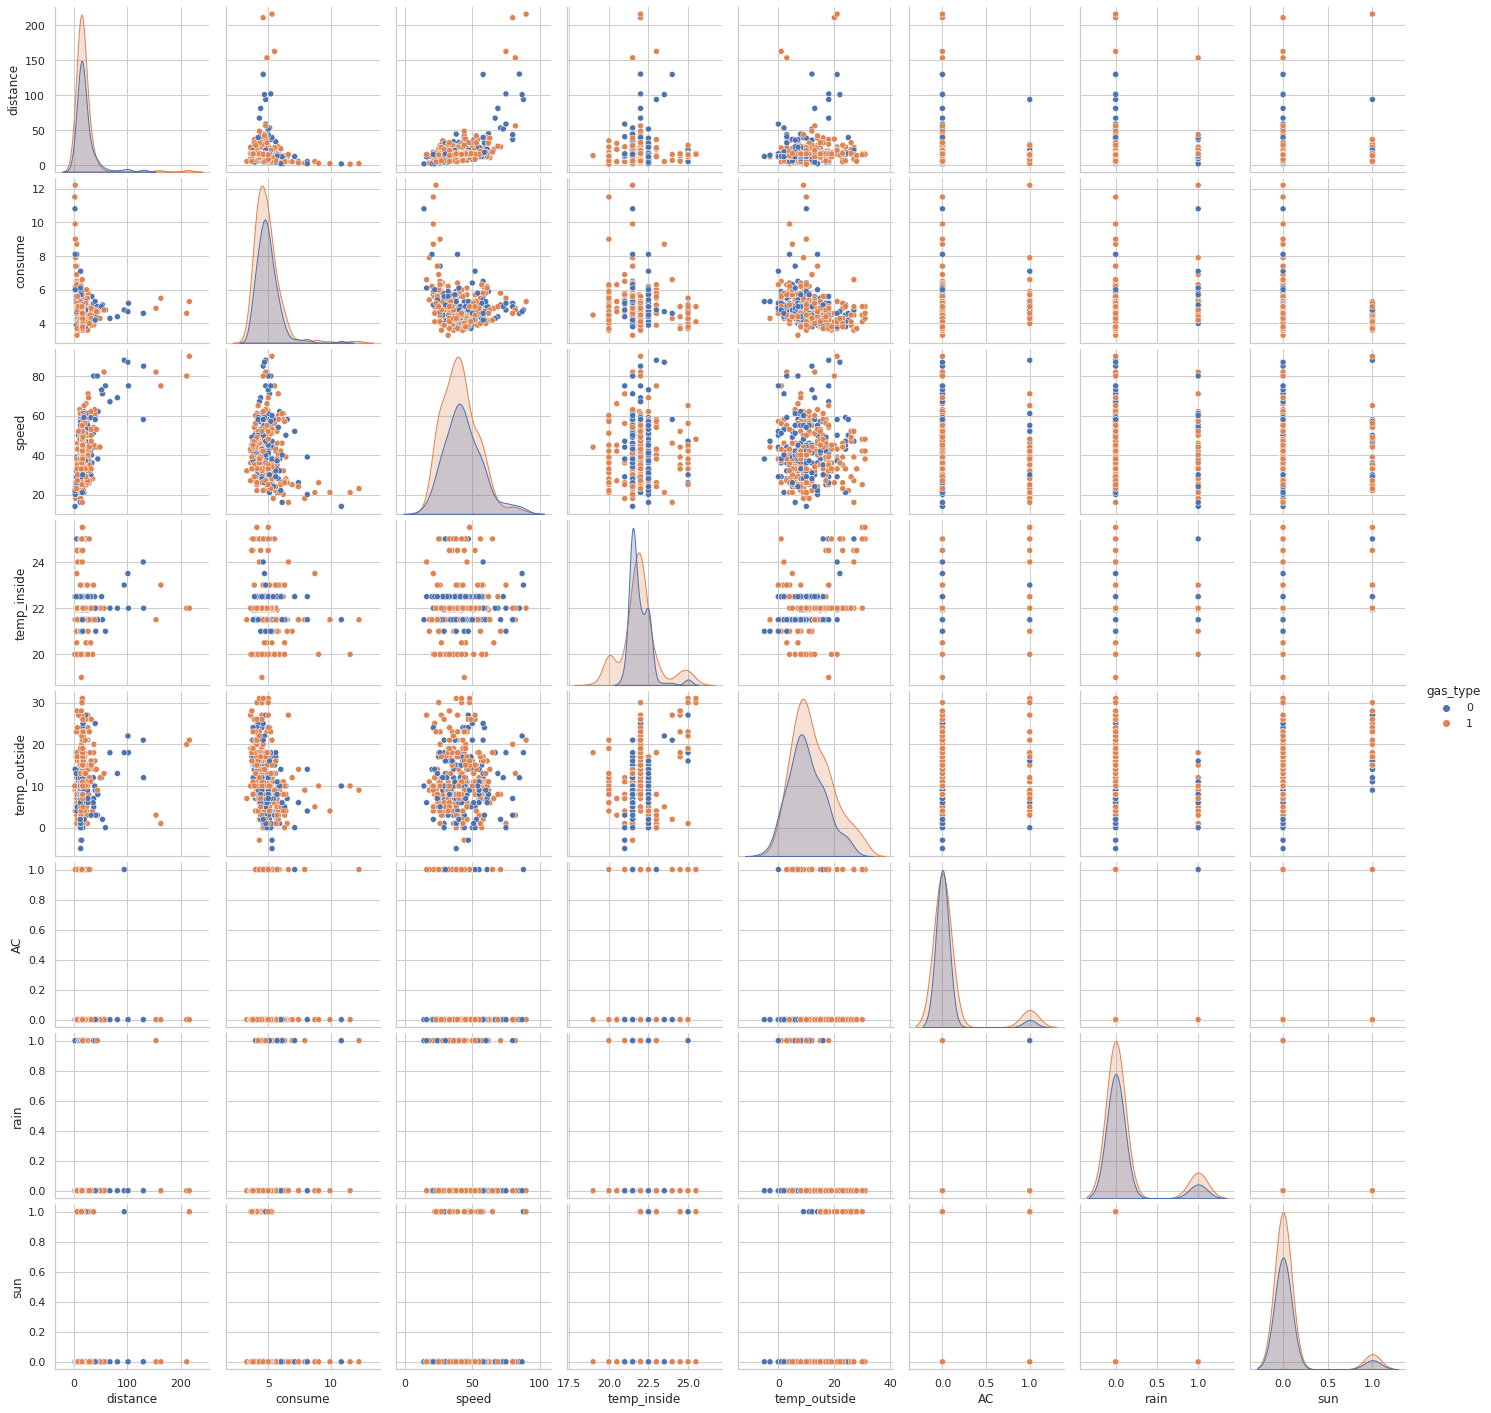

In [291]:
sns.pairplot(dfs, hue='gas_type')

In [280]:
X = dfs.drop('consume', axis=1)
X.head()

,distance,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,26.0,21.5,12.0,0,0,0,0
1,12.0,30.0,21.5,13.0,0,0,0,0
2,11.2,38.0,21.5,15.0,0,0,0,0
3,12.9,36.0,21.5,14.0,0,0,0,0
4,18.5,46.0,21.5,15.0,0,0,0,0


In [281]:
y = dfs.consume
y.head()

0    5.0
1    4.2
2    5.5
3    3.9
4    4.5
Name: consume, dtype: float64

In [282]:
X.shape

(388, 8)

In [283]:
y.shape

(388,)

In [284]:
from sklearn.model_selection import train_test_split as tts

In [285]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)

In [286]:
X_train.shape

(310, 8)

In [287]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [288]:
models={
    'ridge': Ridge(),
    'lasso': Lasso(),
    'sgd': SGDRegressor(),
    'knn': KNeighborsRegressor(),
    'grad': GradientBoostingRegressor(),
}

In [289]:
for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X_train, y_train)

ENTRENANDO:  ridge
ENTRENANDO:  lasso
ENTRENANDO:  sgd
ENTRENANDO:  knn
ENTRENANDO:  grad


In [290]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name}------")
    print('MAE - ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE - ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 - ', metrics.r2_score(y_test, y_pred))

------ridge------
MAE -  0.5769410707910686
MSE -  0.5700992504715872
RMSE -  0.755049170896563
R2 -  0.19162374265404647
------lasso------
MAE -  0.5765045254368677
MSE -  0.5726796646832257
RMSE -  0.756756013972288
R2 -  0.18796482610384713
------sgd------
MAE -  1128064845022.9749
MSE -  1.428226779434959e+24
RMSE -  1195084423559.6743
R2 -  -2.0251642457797578e+24
------knn------
MAE -  0.553076923076923
MSE -  0.5617692307692307
RMSE -  0.7495126621807204
R2 -  0.20343535290443493
------grad------
MAE -  0.5320951756232248
MSE -  0.6041301874082913
RMSE -  0.7772581214810761
R2 -  0.14336933535196195


In [275]:
linreg = LinReg()

In [251]:
linreg.fit(X_train, y_train)

LinearRegression()

In [253]:
y_pred = linreg.predict(X_test)

In [254]:
y_pred.shape

(78,)

<AxesSubplot:ylabel='consume'>

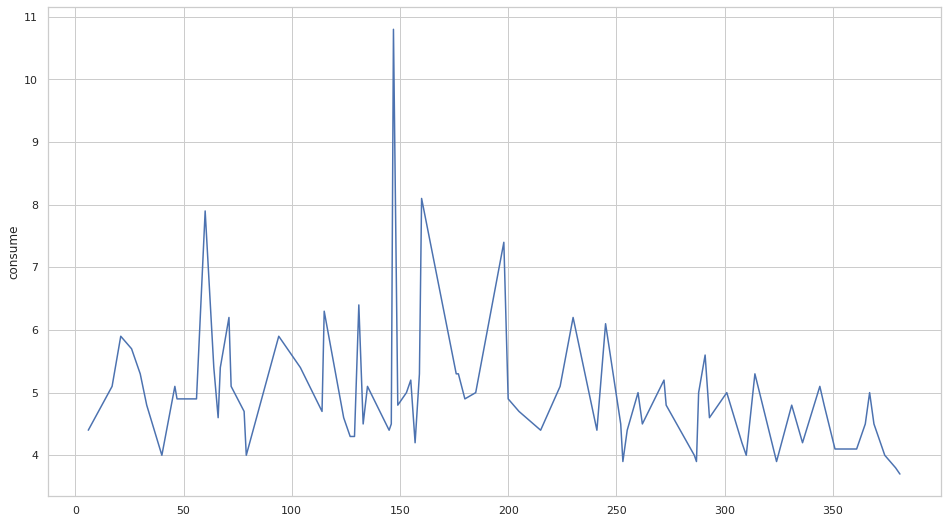

In [267]:
sns.lineplot(data=y_test)

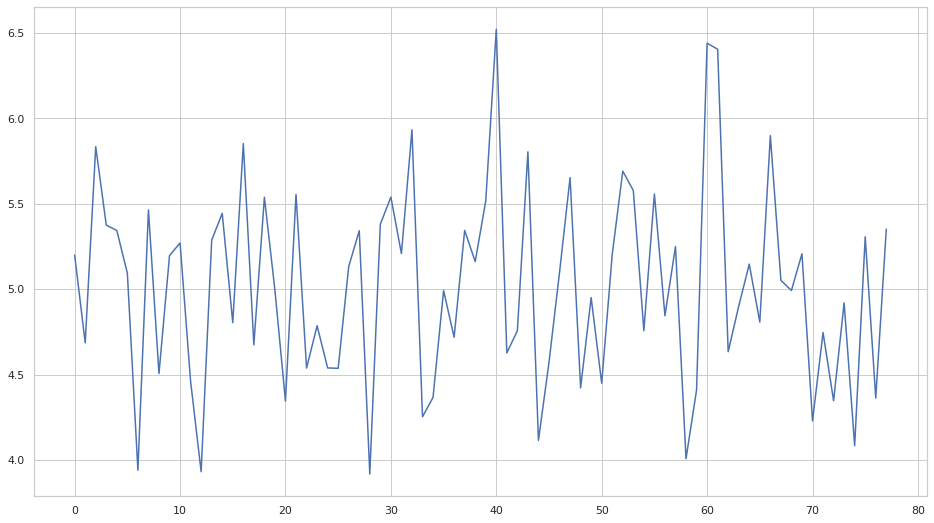

In [263]:
sns.lineplot(data = y_pred);